## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)


In [2]:
df = pd.read_csv('accidents-2020.csv')
df.head(5)

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,country
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1,3,2,E01004576,United Kingdom
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,United Kingdom
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,United Kingdom
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,1,2,E01003617,United Kingdom
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763,United Kingdom


In [3]:
df.shape

(91199, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [5]:
df = df.drop(columns = ['location_easting_osgr', 'location_northing_osgr', 'police_force', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [7]:
df.isnull().sum()

accident_index                              0
accident_year                               0
accident_reference                          0
longitude                                  14
latitude                                   14
accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
date                                        0
day_of_week                                 0
time                                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
junction_control                            0
second_road_class                           0
second_road_number                          0
pedestrian_crossing_human_control           0
pedestrian_crossing_physical_facilities     0
light_conditions                  

In [8]:
df[df['longitude'].isnull()]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country
25520,2020052002442,2020,52002442,NaN,NaN,2,2,1,26/11/2020,5,16:00,3,5038,3,40,6,2,6,0,0,0,1,1,1,0,0,3,United Kingdom
29452,2020070769852,2020,70769852,NaN,NaN,3,2,1,19/12/2020,7,11:10,3,5268,6,40,3,3,6,0,0,0,1,1,1,0,0,3,United Kingdom
32689,2020122001194,2020,122001194,NaN,NaN,3,2,2,30/09/2020,4,18:10,6,0,9,60,3,4,6,0,0,0,1,2,2,0,0,3,United Kingdom
33578,2020137330369,2020,137330369,NaN,NaN,3,2,1,03/03/2020,3,09:16,1,62,3,50,1,4,3,642,0,0,1,1,1,0,0,3,United Kingdom
81252,2020522005114,2020,522005114,NaN,NaN,3,3,2,29/05/2020,6,19:00,3,370,1,40,1,4,3,3033,0,0,7,1,1,0,0,3,United Kingdom
86437,2020622001016,2020,622001016,NaN,NaN,3,2,1,13/11/2020,6,20:16,6,0,6,20,9,2,3,4161,0,5,4,1,1,0,0,3,United Kingdom
86642,202063A017520,2020,63A017520,NaN,NaN,3,2,1,26/02/2020,4,08:15,4,4298,6,50,0,-1,6,0,0,0,1,9,-1,0,0,3,United Kingdom
86651,202063A018920,2020,63A018920,NaN,NaN,3,2,1,27/02/2020,5,05:55,4,4303,6,30,3,4,6,0,0,0,1,9,1,0,0,3,United Kingdom
86668,202063A025020,2020,63A025020,NaN,NaN,3,2,1,12/02/2020,4,08:15,4,4306,6,30,0,-1,6,0,0,0,1,2,2,0,0,3,United Kingdom
86705,202063A035620,2020,63A035620,NaN,NaN,3,1,1,10/06/2020,4,18:35,6,0,6,60,0,-1,6,0,0,0,1,1,1,0,0,3,United Kingdom


In [9]:
df = df.dropna(how = 'any', axis = 0)

In [10]:
df.shape

(91185, 28)

In [11]:
df.isnull().sum()

accident_index                             0
accident_year                              0
accident_reference                         0
longitude                                  0
latitude                                   0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_co

In [12]:
df.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1,United Kingdom
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,United Kingdom
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,United Kingdom
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,01:50,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,United Kingdom
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,02:25,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,United Kingdom


In [13]:
df['date']

0        04/02/2020
1        27/04/2020
2        01/01/2020
3        01/01/2020
4        01/01/2020
            ...    
91194    12/08/2020
91195    13/11/2020
91196    15/04/2020
91197    15/12/2020
91198    25/08/2020
Name: date, Length: 91185, dtype: object

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91185 non-null  object        
 1   accident_year                            91185 non-null  int64         
 2   accident_reference                       91185 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91185 non-null  int64         
 6   number_of_vehicles                       91185 non-null  int64         
 7   number_of_casualties                     91185 non-null  int64         
 8   date                                     91185 non-null  datetime64[ns]
 9   day_of_week                            

In [16]:
df['month'] = df['date'].dt.month

In [17]:
df['day'] = df['date'].dt.day

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91185 non-null  object        
 1   accident_year                            91185 non-null  int64         
 2   accident_reference                       91185 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91185 non-null  int64         
 6   number_of_vehicles                       91185 non-null  int64         
 7   number_of_casualties                     91185 non-null  int64         
 8   date                                     91185 non-null  datetime64[ns]
 9   day_of_week                            

In [19]:
df[['month','day']]

,month,day
0,4,2
1,4,27
2,1,1
3,1,1
4,1,1
...,...,...
91194,12,8
91195,11,13
91196,4,15
91197,12,15


In [20]:
df.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,2020-04-02,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1,United Kingdom,4,2
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,2020-04-27,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,United Kingdom,4,27
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,2020-01-01,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,United Kingdom,1,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,2020-01-01,4,01:50,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,United Kingdom,1,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,2020-01-01,4,02:25,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,United Kingdom,1,1


In [21]:
df.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,month,day
count,91185.0,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000,91185.000000
mean,2020.0,-1.189258,52.351073,2.768218,1.835258,1.267390,4.121467,4.220310,790.430992,5.255974,36.268553,3.935165,1.737534,5.551801,220.179865,0.353030,1.185436,2.065252,1.701925,1.391643,0.244777,0.180622,1.322948,6.565937,15.699106
std,0.0,1.367786,1.327573,0.456695,0.677299,0.681506,1.932236,1.443469,1580.573325,1.684852,13.895612,12.613683,2.510160,1.015073,913.618020,1.698241,2.446039,1.747575,1.845582,0.925713,1.318652,1.149878,0.467606,3.501388,8.660658
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2020.0,-2.107789,51.457237,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,9.000000
50%,2020.0,-1.046912,51.763385,3.000000,2.000000,1.000000,4.000000,4.000000,34.000000,6.000000,30.000000,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,7.000000,15.000000
75%,2020.0,-0.125238,53.297386,3.000000,2.000000,1.000000,6.000000,6.000000,538.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,10.000000,23.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,7.000000,6.000000,9174.000000,9.000000,70.000000,99.000000,9.000000,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,2.000000,12.000000,31.000000


In [22]:
df.select_dtypes(include = 'object').describe()

,accident_index,accident_reference,time,country
count,91185,91185,91185,91185
unique,91185,91185,1438,1
top,2020010229759,52000485,17:00,United Kingdom
freq,1,1,862,91185


In [23]:
df['time'] = pd.to_datetime(df['time'])

In [24]:
df['time']

0       2021-11-29 09:00:00
1       2021-11-29 13:55:00
2       2021-11-29 01:25:00
3       2021-11-29 01:50:00
4       2021-11-29 02:25:00
                ...        
91194   2021-11-29 14:30:00
91195   2021-11-29 15:05:00
91196   2021-11-29 12:42:00
91197   2021-11-29 14:00:00
91198   2021-11-29 13:50:00
Name: time, Length: 91185, dtype: datetime64[ns]

In [25]:
df[['date', 'time']]

,date,time
0,2020-04-02,2021-11-29 09:00:00
1,2020-04-27,2021-11-29 13:55:00
2,2020-01-01,2021-11-29 01:25:00
3,2020-01-01,2021-11-29 01:50:00
4,2020-01-01,2021-11-29 02:25:00
...,...,...
91194,2020-12-08,2021-11-29 14:30:00
91195,2020-11-13,2021-11-29 15:05:00
91196,2020-04-15,2021-11-29 12:42:00
91197,2020-12-15,2021-11-29 14:00:00


In [26]:
df['hour'] = df['time'].dt.hour

In [27]:
df[['time', 'hour']]

,time,hour
0,2021-11-29 09:00:00,9
1,2021-11-29 13:55:00,13
2,2021-11-29 01:25:00,1
3,2021-11-29 01:50:00,1
4,2021-11-29 02:25:00,2
...,...,...
91194,2021-11-29 14:30:00,14
91195,2021-11-29 15:05:00,15
91196,2021-11-29 12:42:00,12
91197,2021-11-29 14:00:00,14


In [28]:
df['number_of_casualties'].value_counts()

1     74150
2     12218
3      3214
4      1063
5       349
6       115
7        43
8        14
9         7
11        4
10        3
41        1
19        1
17        1
13        1
12        1
Name: number_of_casualties, dtype: int64

In [29]:
df.groupby('hour')['number_of_casualties'].count()

hour
0     1188
1      915
2      658
3      566
4      508
5      854
6     1830
7     3736
8     5265
9     3916
10    4172
11    4811
12    5395
13    5741
14    6244
15    7361
16    7380
17    7813
18    6615
19    5047
20    3714
21    3105
22    2555
23    1796
Name: number_of_casualties, dtype: int64

In [30]:
df2 = df[df['number_of_casualties'] > 3]
df2.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,2020-01-01,4,2021-11-29 03:40:00,3,10,3,40,6,2,5,0,0,5,4,1,2,0,0,1,United Kingdom,1,1,3
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,2020-03-01,6,2021-11-29 22:45:00,3,10,1,20,1,2,3,406,0,9,4,1,1,0,0,1,United Kingdom,3,1,22
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,2020-06-01,2,2021-11-29 15:50:00,4,4557,6,30,0,-1,6,0,0,0,4,1,1,6,0,1,United Kingdom,6,1,15
250,2020010228907,2020,10228907,0.189351,51.582855,2,2,4,2020-07-01,3,2021-11-29 09:25:00,5,0,6,30,7,4,3,118,0,1,1,1,1,0,0,1,United Kingdom,7,1,9
279,2020010228985,2020,10228985,-0.299502,51.530914,3,4,6,2020-07-01,3,2021-11-29 19:24:00,3,40,3,40,0,-1,6,0,0,0,4,1,1,0,0,1,United Kingdom,7,1,19


## Question 1
At What particular time and day of the week did most number of accidents happened.

In [31]:
abc = df2.groupby('hour')['number_of_casualties'].agg(['count', 'sum'])
abc

,count,sum
hour,,
0,36,155
1,25,113
2,15,66
3,15,65
4,8,36
5,14,60
6,19,91
7,28,134
8,57,309


In [32]:
accident_timing = pd.DataFrame(data = abc)
accident_timing.reset_index(inplace = True)
accident_timing.rename(columns = {'count':'count_of_accidents', 'sum':'number_of_casualties'}, inplace = True)
accident_timing.head(5)

,hour,count_of_accidents,number_of_casualties
0,0,36,155
1,1,25,113
2,2,15,66
3,3,15,65
4,4,8,36


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


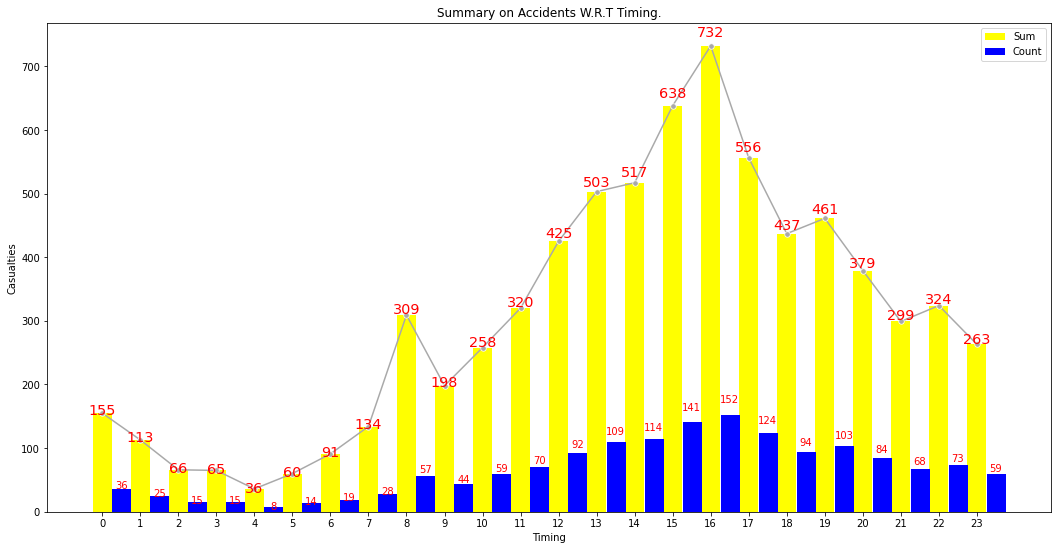

In [124]:
plt.figure(figsize = (18,9))
plt.bar(accident_timing['hour'], accident_timing['number_of_casualties'], label = 'Sum', width = 0.5 ,color = 'yellow')
plt.bar(accident_timing['hour']+0.51, accident_timing['count_of_accidents'], label = 'Count', width = 0.5,color = 'blue')
sns.lineplot(accident_timing['hour'], accident_timing['number_of_casualties'], color = 'darkgrey', marker = '.', ms = 11)
plt.ylabel('Casualties')
plt.xlabel('Timing')
plt.xticks(np.arange(24))
plt.title('Summary on Accidents W.R.T Timing.')
for i in range(len(accident_timing['hour'])):
    plt.text(i, accident_timing['number_of_casualties'][i]*1.03,accident_timing['number_of_casualties'][i], ha = 'center', va = 'center', fontstyle = 'normal', color = 'red', fontsize = 'x-large')
    plt.text(i+0.5, accident_timing['count_of_accidents'][i]*1.16,accident_timing['count_of_accidents'][i], ha = 'center', va = 'center', fontstyle = 'normal', color = 'red', fontsize = 'medium')
plt.show()

### Description

In [34]:
accident_dayofweek = df2.groupby('day_of_week')['number_of_casualties'].agg(['sum','count'])
accident_dayofweek

,sum,count
day_of_week,,
1,1202,263
2,882,193
3,954,210
4,932,199
5,913,191
6,1149,257
7,1307,290


In [35]:
accident_dayofweek_df = pd.DataFrame(data = accident_dayofweek)
accident_dayofweek_df.reset_index(inplace = True)
accident_dayofweek_df.rename(columns = {'sum':'number_of_casualties', 'count':'count_of_casualties'}, inplace = True)

In [36]:
accident_dayofweek_df

,day_of_week,number_of_casualties,count_of_casualties
0,1,1202,263
1,2,882,193
2,3,954,210
3,4,932,199
4,5,913,191
5,6,1149,257
6,7,1307,290


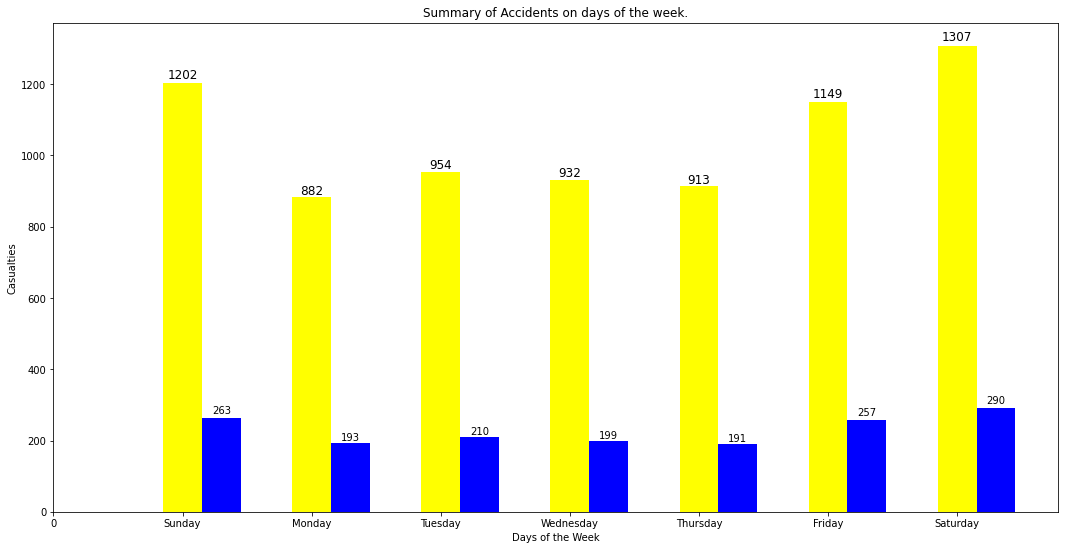

In [37]:
plt.figure(figsize = (18,9))
plt.bar(accident_dayofweek_df['day_of_week'], accident_dayofweek_df['number_of_casualties'], width = 0.3, color ='yellow')
plt.bar(accident_dayofweek_df['day_of_week']+0.3, accident_dayofweek_df['count_of_casualties'], width = 0.3, color = 'blue')
x_ticks = np.arange(8)
x_labels = ['0','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Summary of Accidents on days of the week.')
for i in range(len(accident_dayofweek_df)):
    plt.text(i+1,accident_dayofweek_df['number_of_casualties'].iloc[i]*1.02,accident_dayofweek_df['number_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
    plt.text(i+1.3,accident_dayofweek_df['count_of_casualties'].iloc[i]*1.08,accident_dayofweek_df['count_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'medium')

plt.show()

### Description

In [38]:
accident_dayofweek_hour = df2.groupby(['hour', 'day_of_week'])['number_of_casualties'].count()
accident_dayofweek_hour = pd.DataFrame(data = accident_dayofweek_hour)
accident_dayofweek_hour.reset_index(inplace = True)
#accident_dayofweek_hour

In [39]:
accident_dayofweek_hour.sort_values(by = ['number_of_casualties'], ascending = False).head(150)

,hour,day_of_week,number_of_casualties
107,16,1,34
93,14,1,27
102,15,3,25
86,13,1,25
100,15,1,25
114,17,1,24
120,17,7,24
155,22,7,23
133,19,6,22
113,16,7,22


# Question 2

In [40]:
df3 = pd.DataFrame(data = df2)

In [41]:
df3.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,2020-01-01,4,2021-11-29 03:40:00,3,10,3,40,6,2,5,0,0,5,4,1,2,0,0,1,United Kingdom,1,1,3
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,2020-03-01,6,2021-11-29 22:45:00,3,10,1,20,1,2,3,406,0,9,4,1,1,0,0,1,United Kingdom,3,1,22
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,2020-06-01,2,2021-11-29 15:50:00,4,4557,6,30,0,-1,6,0,0,0,4,1,1,6,0,1,United Kingdom,6,1,15
250,2020010228907,2020,10228907,0.189351,51.582855,2,2,4,2020-07-01,3,2021-11-29 09:25:00,5,0,6,30,7,4,3,118,0,1,1,1,1,0,0,1,United Kingdom,7,1,9
279,2020010228985,2020,10228985,-0.299502,51.530914,3,4,6,2020-07-01,3,2021-11-29 19:24:00,3,40,3,40,0,-1,6,0,0,0,4,1,1,0,0,1,United Kingdom,7,1,19


## Pattern 1:

In [42]:
month_pattern = df2.groupby('month')['number_of_casualties'].sum()
month_pattern

month
1     770
2     807
3     353
4     310
5     535
6     677
7     688
8     875
9     690
10    595
11    517
12    522
Name: number_of_casualties, dtype: int64

In [43]:
#month_pattern.reset_index(inplace = True)
month_pattern_df = pd.DataFrame(data = month_pattern)
month_pattern_df.reset_index(inplace = True)

In [44]:
month_pattern_df

,month,number_of_casualties
0,1,770
1,2,807
2,3,353
3,4,310
4,5,535
5,6,677
6,7,688
7,8,875
8,9,690
9,10,595


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


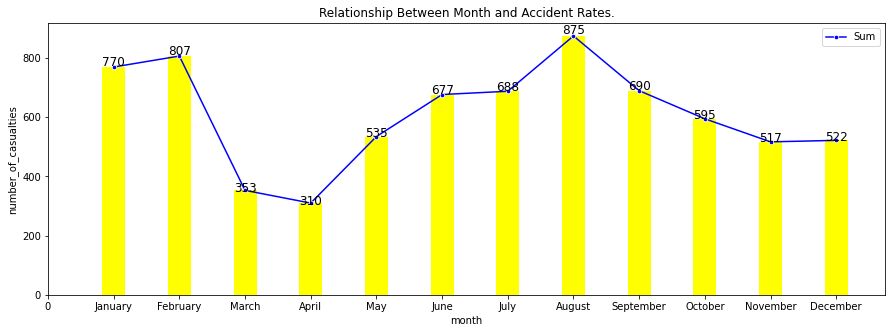

In [45]:
plt.figure(figsize = (15,5))
plt.bar(month_pattern_df['month'], month_pattern_df['number_of_casualties'], color = 'yellow', width = 0.35)
sns.lineplot(month_pattern_df['month'], month_pattern_df['number_of_casualties'], color= 'blue', label = 'Sum', marker = '.', ms = 9)
xticks = np.arange(13)
x_labels = ['0','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks = xticks, labels = x_labels)
plt.title('Relationship Between Month and Accident Rates.')
for i in range(len(month_pattern_df)):
    plt.text(i+1,month_pattern_df['number_of_casualties'].iloc[i]*1.02,month_pattern_df['number_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
plt.show()

### Description



## Pattern 2

In [46]:
urban_rural = df2.groupby(['day_of_week','urban_or_rural_area'])['number_of_casualties'].agg(['sum', 'count'])
urban_rural

sum  count
day_of_week urban_or_rural_area            
1           1                    574    126
            2                    628    137
2           1                    409     92
            2                    473    101
3           1                    484    109
            2                    470    101
4           1                    514    109
            2                    418     90
5           1                    415     91
            2                    498    100
6           1                    567    129
            2                    582    128
7           1                    641    146
            2                    666    144

In [47]:
urban_rural_df = pd.DataFrame(data = urban_rural)
urban_rural_df.reset_index(inplace = True)

In [48]:
urban_rural_df

,day_of_week,urban_or_rural_area,sum,count
0,1,1,574,126
1,1,2,628,137
2,2,1,409,92
3,2,2,473,101
4,3,1,484,109
5,3,2,470,101
6,4,1,514,109
7,4,2,418,90
8,5,1,415,91
9,5,2,498,100


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


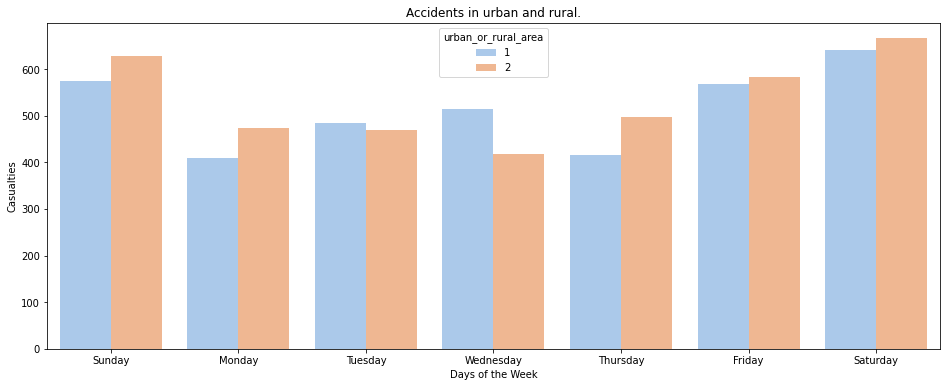

In [49]:
plt.figure(figsize = (16,6))
sns.barplot(urban_rural_df['day_of_week'], urban_rural_df['sum'], hue = urban_rural_df['urban_or_rural_area'], palette = 'pastel')
x_ticks = np.arange(7)
x_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Accidents in urban and rural.')
plt.show()

### Description






## Pattern 3 

### Question 1 

In [50]:
cars = df2.groupby(['day_of_week','pedestrian_crossing_human_control'])['number_of_casualties'].sum()

In [51]:
dool = pd.DataFrame(data = cars)
dool.reset_index(inplace = True)
dool.head(30)

,day_of_week,pedestrian_crossing_human_control,number_of_casualties
0,1,-1,4
1,1,0,1160
2,1,2,14
3,1,9,24
4,2,0,863
5,2,1,5
6,2,2,5
7,2,9,9
8,3,0,942
9,3,1,4


In [52]:
dool['pedestrian_crossing_human_control'].unique()

array([-1,  0,  2,  9,  1], dtype=int64)

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


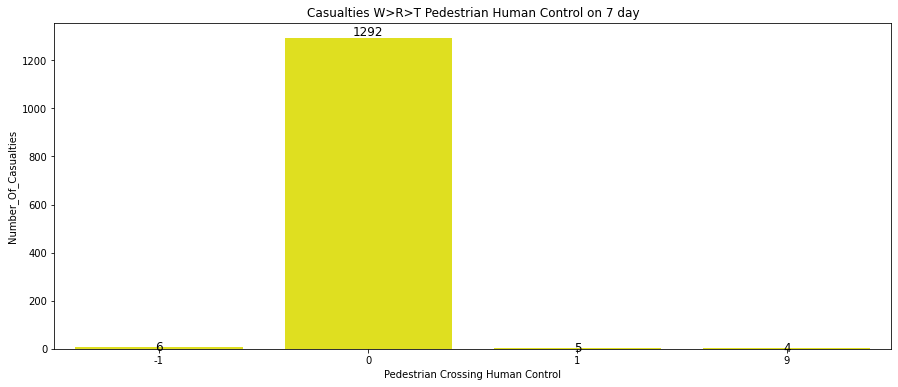

In [53]:
def func(n):
    if n < 0 or n > 7:
        return -1
    na = dool[dool['day_of_week'] == n]
    plt.figure(figsize = (15,6))
    sns.barplot(na['pedestrian_crossing_human_control'], na['number_of_casualties'], color  = 'yellow')
    plt.title('Casualties W>R>T Pedestrian Human Control on '+ str(n) + ' day')
    plt.xlabel('Pedestrian Crossing Human Control')
    plt.ylabel('Number_Of_Casualties')
    for i in range(len(na['pedestrian_crossing_human_control'])):
        plt.text(i,na['number_of_casualties'].iloc[i]*1.02, na['number_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
    plt.show()
func(7)

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


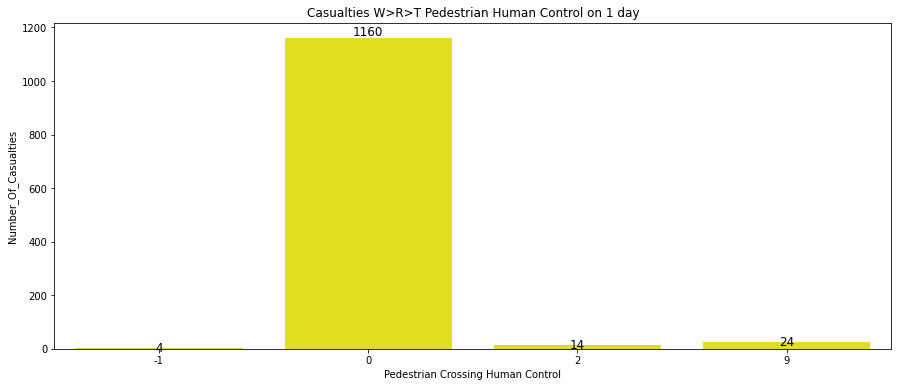

In [54]:
func(1)

### Question 2 
At what particular day most number of major accidents took place and at what type of road?

In [55]:
jim = df.groupby(['day_of_week', 'road_type'])['number_of_casualties'].agg(['sum', 'count'])
jim.reset_index(inplace = True)

In [56]:
jim

,day_of_week,road_type,sum,count
0,1,1,838,695
1,1,2,266,229
2,1,3,2192,1490
3,1,6,9825,7501
4,1,7,220,178
5,1,9,256,221
6,2,1,941,794
7,2,2,283,246
8,2,3,2584,1901
9,2,6,11640,9329


In [57]:
x_ticks = jim['road_type'].unique()
x_ticks

array([1, 2, 3, 6, 7, 9], dtype=int64)

In [58]:
def func(n):
    if n < 0 or n > 7:
        return 'Integer No Valid'
    nan = jim[jim['day_of_week'] == n]
    plt.figure(figsize = (11,6))
    sns.barplot(nan['road_type'], nan['count'], color  = 'yellow')
    plt.title('Casualties W>R>T Road Type on '+ str(n) + ' day')
    plt.xlabel('Road Type')
    plt.ylabel('Count_of_Accidents')
    for i in range(len(nan['road_type'])):
        plt.text(i,nan['count'].iloc[i]*1.03, nan['count'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
    plt.show()
#func(7)

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


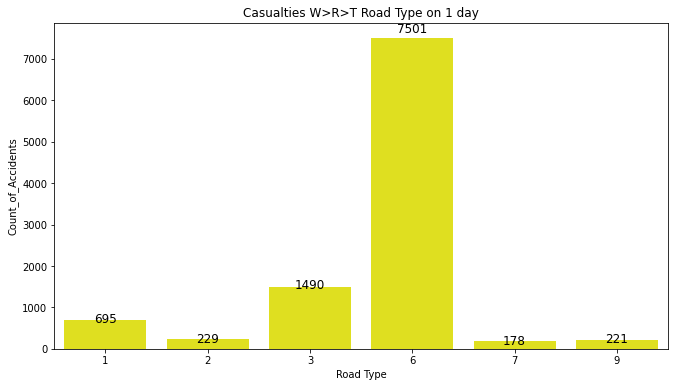

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


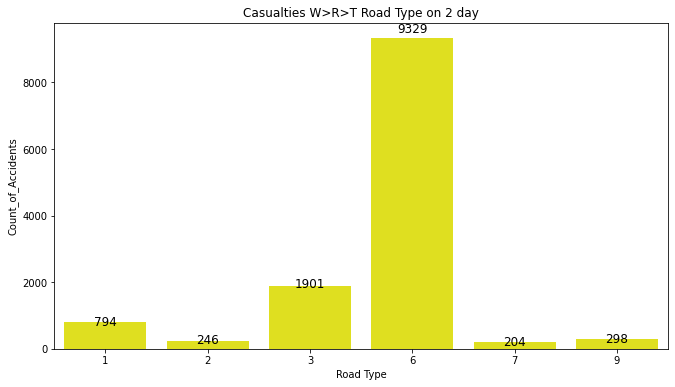

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


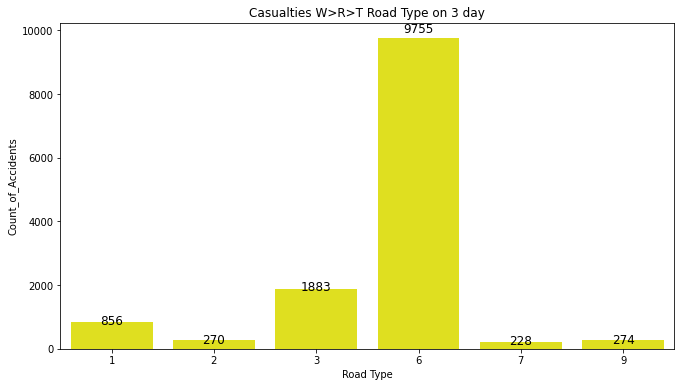

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


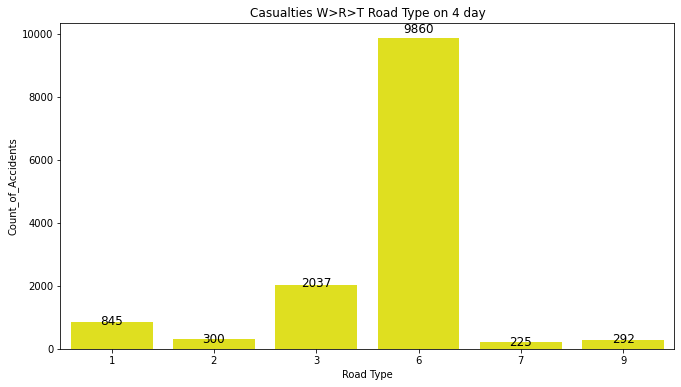

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


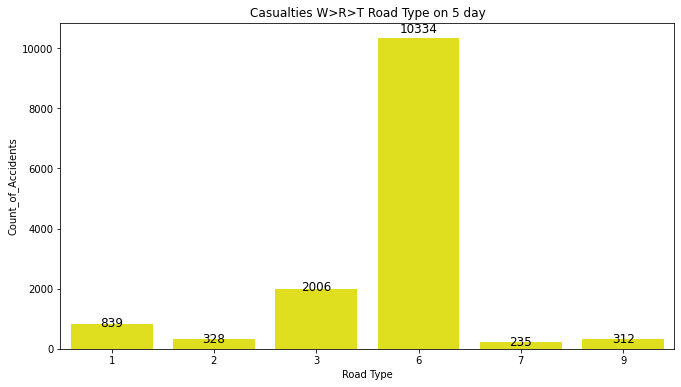

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


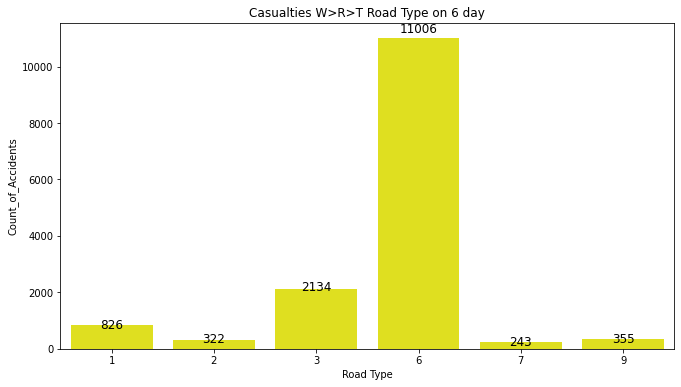

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


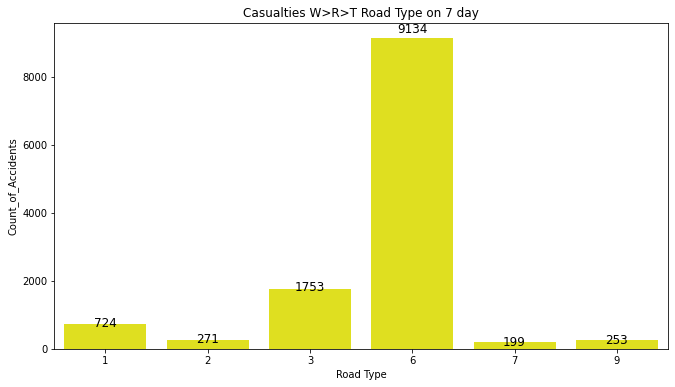

In [59]:
for i in range(1,8):
    func(i)

### Question 3
Analysing Accidents W>R>T Type of the road and pedestrian_crossing_physical_facilities, Junction Control, Accident_severity.

In [60]:
dwight = df2.groupby(['road_type', 'pedestrian_crossing_physical_facilities'])['number_of_casualties'].count()
dwight = dwight.reset_index()

In [61]:
dwight.style.background_gradient(cmap='PuBu')

,road_type,pedestrian_crossing_physical_facilities,number_of_casualties
0,1,0,42
1,1,1,2
2,1,4,2
3,1,5,1
4,1,8,3
5,1,9,3
6,2,0,6
7,2,1,2
8,2,4,1
9,2,5,2


In [62]:
shrute = df2.groupby(['road_type', 'junction_control'])['number_of_casualties'].count()
shrute = shrute.reset_index()

In [63]:
shrute.style.background_gradient(cmap='Blues')

,road_type,junction_control,number_of_casualties
0,1,-1,7
1,1,1,1
2,1,2,8
3,1,4,37
4,2,-1,4
5,2,2,6
6,2,4,4
7,3,-1,229
8,3,1,2
9,3,2,67


In [64]:
pam = df2.groupby(['road_type', 'light_conditions'])['number_of_casualties'].count()
pam = pam.reset_index()

In [65]:
pam.style.background_gradient(cmap = 'Blues')

,road_type,light_conditions,number_of_casualties
0,1,1,28
1,1,4,25
2,2,1,10
3,2,4,3
4,2,7,1
5,3,1,232
6,3,4,93
7,3,5,1
8,3,6,24
9,3,7,2


In [66]:
x = pd.crosstab(df2['accident_severity'],df2['road_type'])
x.style.background_gradient(cmap='viridis')
#x.plot(kind = 'bar')

road_type,1,2,3,6,7,9
accident_severity,,,,,,
1,1,0,13,64,1,0
2,12,1,89,405,12,1
3,40,13,250,674,21,6


### Question 4
Analysis on How does weather affect number of accidents.

In [67]:
wmn = df2[['weather_conditions', 'month', 'number_of_casualties']]
wmn

,weather_conditions,month,number_of_casualties
11,1,1,4
136,1,3,4
212,1,6,4
250,1,7,4
279,1,7,6
...,...,...,...
91059,1,12,4
91069,7,12,4
91132,5,12,6
91167,1,12,5


In [68]:
y = pd.crosstab(df2['weather_conditions'], df2['month'])
y.style.background_gradient(cmap = 'Blues')

month,1,2,3,4,5,6,7,8,9,10,11,12
weather_conditions,,,,,,,,,,,,
1,125,104,52,46,105,126,130,150,122,94,75,82
2,18,42,22,16,8,19,10,30,15,25,21,21
3,0,2,1,0,0,0,0,0,0,0,1,1
4,2,9,2,0,2,0,2,3,1,3,2,2
5,6,11,0,3,1,1,3,2,7,2,5,1
6,0,1,1,0,0,0,0,0,0,0,0,0
7,4,0,0,0,2,1,1,0,1,0,5,1
8,7,1,1,3,1,3,3,3,2,2,4,3
9,5,2,1,1,0,0,4,1,1,1,2,2


In [69]:
df2.groupby('weather_conditions')['number_of_casualties'].count()

weather_conditions
1    1211
2     247
3       5
4      28
5      42
6       2
7      15
8      33
9      20
Name: number_of_casualties, dtype: int64

c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


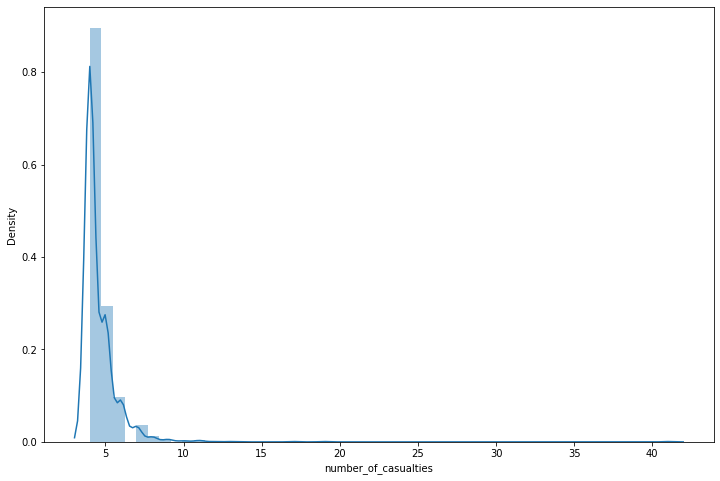

In [70]:
plt.figure(figsize = (12,8))
sns.distplot(df2['number_of_casualties'])
plt.show()

In [71]:
v = pd.crosstab(index = df2['weather_conditions'], columns = df2['road_surface_conditions'], values = df2['number_of_casualties'], aggfunc = sum)
v.style.background_gradient(cmap = 'Wistia')

road_surface_conditions,-1,1,2,3,4,5,9
weather_conditions,,,,,,,
1,5.000000,4437.000000,1075.000000,nan,35.000000,nan,5.000000
2,nan,50.000000,1038.000000,nan,nan,12.000000,4.000000
3,nan,nan,14.000000,4.000000,5.000000,nan,nan
4,nan,106.000000,30.000000,nan,nan,nan,nan
5,4.000000,nan,186.000000,nan,nan,8.000000,nan
6,nan,nan,4.000000,nan,5.000000,nan,nan
7,nan,15.000000,52.000000,nan,nan,nan,nan
8,nan,33.000000,116.000000,nan,8.000000,nan,nan
9,4.000000,50.000000,25.000000,nan,nan,nan,9.000000


## Question 5
At what time did most number of accidents happened W>R>T Accident_severity.

In [72]:
df2

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,2020-01-01,4,2021-11-29 03:40:00,3,10,3,40,6,2,5,0,0,5,4,1,2,0,0,1,United Kingdom,1,1,3
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,2020-03-01,6,2021-11-29 22:45:00,3,10,1,20,1,2,3,406,0,9,4,1,1,0,0,1,United Kingdom,3,1,22
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,2020-06-01,2,2021-11-29 15:50:00,4,4557,6,30,0,-1,6,0,0,0,4,1,1,6,0,1,United Kingdom,6,1,15
250,2020010228907,2020,10228907,0.189351,51.582855,2,2,4,2020-07-01,3,2021-11-29 09:25:00,5,0,6,30,7,4,3,118,0,1,1,1,1,0,0,1,United Kingdom,7,1,9
279,2020010228985,2020,10228985,-0.299502,51.530914,3,4,6,2020-07-01,3,2021-11-29 19:24:00,3,40,3,40,0,-1,6,0,0,0,4,1,1,0,0,1,United Kingdom,7,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91059,2020991009466,2020,991009466,-3.716604,55.678670,3,2,4,2020-12-22,3,2021-11-29 20:11:00,3,70,6,50,0,-1,6,0,0,0,4,1,2,0,0,2,United Kingdom,12,22,20
91069,2020991009823,2020,991009823,-4.689159,55.746336,2,1,4,2020-12-23,4,2021-11-29 03:00:00,4,780,6,30,0,-1,6,0,0,0,4,7,2,0,0,1,United Kingdom,12,23,3
91132,2020991010996,2020,991010996,-3.102564,56.195331,2,3,6,2020-12-26,7,2021-11-29 11:30:00,3,911,6,60,3,4,3,911,0,0,1,5,2,0,0,2,United Kingdom,12,26,11
91167,2020991012929,2020,991012929,-2.548388,56.631179,2,2,5,2020-12-28,2,2021-11-29 16:40:00,3,92,6,60,0,-1,6,0,0,0,6,1,4,0,0,2,United Kingdom,12,28,16


In [73]:
hsn = df2.groupby(['hour', 'special_conditions_at_site'])[['number_of_casualties']].sum().sort_values(by = 'number_of_casualties', ascending = False)
hsn

,,number_of_casualties
hour,special_conditions_at_site,
16,0,711
15,0,608
17,0,552
14,0,496
13,0,461
19,0,452
18,0,433
12,0,410
20,0,365


In [74]:
qwe = df2[['hour', 'number_of_casualties', 'accident_severity', 'month']]

In [75]:
abd = qwe.groupby(['hour', 'accident_severity'])['number_of_casualties'].agg(['sum', 'count'])
abd = pd.DataFrame(data = abd)
abd.reset_index(inplace = True)
abd

,hour,accident_severity,sum,count
0,0,1,8,2
1,0,2,85,19
2,0,3,62,15
3,1,1,8,2
4,1,2,52,11
5,1,3,53,12
6,2,1,9,2
7,2,2,21,5
8,2,3,36,8
9,3,1,10,2


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


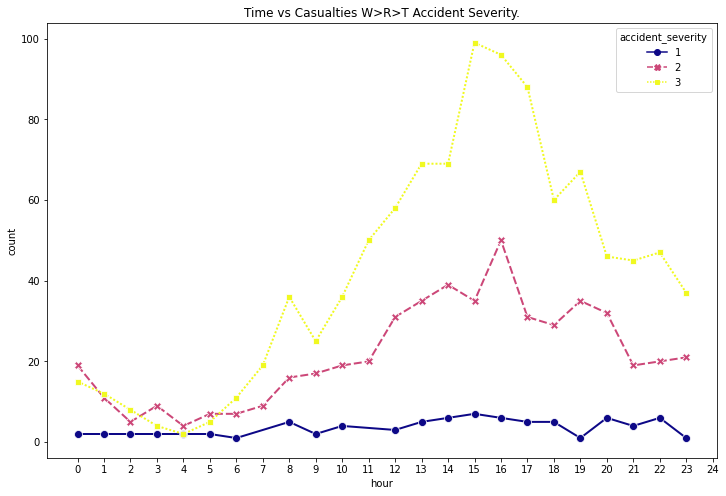

In [76]:
plt.figure(figsize = (12,8))
sns.lineplot(abd['hour'], abd['count'], hue = abd['accident_severity'],style = abd['accident_severity'] ,palette = 'plasma', lw=2,markers = True, ms = 8, estimator = 'sum')
xticks = np.arange(25)
plt.xticks(ticks = xticks)
plt.title('Time vs Casualties W>R>T Accident Severity.')
plt.show()


In [77]:
df2[['road_surface_conditions', 'weather_conditions', 'month']].head(50)

,road_surface_conditions,weather_conditions,month
11,2,1,1
136,1,1,3
212,1,1,6
250,1,1,7
279,1,1,7
315,1,1,7
341,1,1,8
465,1,1,10
653,2,5,1
759,2,1,1


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='weather_conditions'>

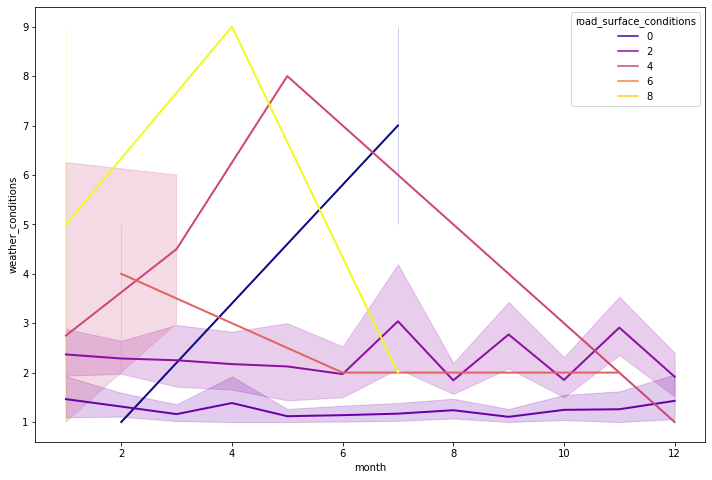

In [78]:
plt.figure(figsize = (12,8))
sns.lineplot( df2['month'],df2['weather_conditions'], hue = df2['road_surface_conditions'], palette = 'plasma', lw =2,markers = True, ms = 9, ci = 95, alpha = 1)

## Question 6 
Carriageway Hazards and number of casualties

In [79]:
cn = pd.crosstab(df2['carriageway_hazards'], df2['number_of_casualties'])
cn.style.background_gradient(cmap = 'Blues')

number_of_casualties,4,5,6,7,8,9,10,11,12,13,17,19,41
carriageway_hazards,,,,,,,,,,,,,
-1,1,2,0,0,0,0,0,0,0,0,0,0,0
0,1029,341,111,42,14,6,3,4,1,1,1,1,1
1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,14,3,2,1,0,0,0,0,0,0,0,0,0
3,8,2,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,6,1,1,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
chn = df2.groupby('carriageway_hazards')['number_of_casualties'].agg(['sum', 'count'])
chn = chn.reset_index()
chn

,carriageway_hazards,sum,count
0,-1,14,3
1,0,7123,1555
2,1,10,2
3,2,90,20
4,3,51,11
5,6,4,1
6,7,35,8
7,9,12,3


c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ab\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


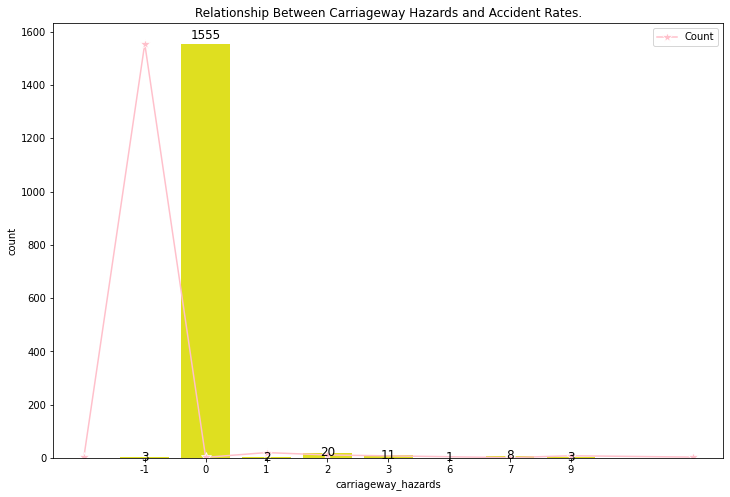

In [81]:
plt.figure(figsize = (12,8))
sns.barplot(chn['carriageway_hazards'], chn['count'], color = 'yellow')
sns.lineplot(chn['carriageway_hazards'], chn['count'], color= 'pink', label = 'Count', marker = '*', ms = 10)
plt.title('Relationship Between Carriageway Hazards and Accident Rates.')
for i in range(len(chn)):
    plt.text(i,chn['count'].iloc[i]*1.02,chn['count'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
plt.show()

# Question 3
what charecteristics standout in major accidents when comapred to other accidents.

In [82]:
df3 = df[df['number_of_casualties'] <= 3]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89582 entries, 0 to 91198
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           89582 non-null  object        
 1   accident_year                            89582 non-null  int64         
 2   accident_reference                       89582 non-null  object        
 3   longitude                                89582 non-null  float64       
 4   latitude                                 89582 non-null  float64       
 5   accident_severity                        89582 non-null  int64         
 6   number_of_vehicles                       89582 non-null  int64         
 7   number_of_casualties                     89582 non-null  int64         
 8   date                                     89582 non-null  datetime64[ns]
 9   day_of_week                            

In [83]:
df3.head(5)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,2020-04-02,3,2021-11-29 09:00:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1,United Kingdom,4,2,9
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,2020-04-27,2,2021-11-29 13:55:00,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,United Kingdom,4,27,13
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,2020-01-01,4,2021-11-29 01:25:00,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,United Kingdom,1,1,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,2020-01-01,4,2021-11-29 01:50:00,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,United Kingdom,1,1,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,2020-01-01,4,2021-11-29 02:25:00,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,United Kingdom,1,1,2


In [84]:
lion = df3.groupby('hour')['number_of_casualties'].agg(['sum', 'count'])
lion.reset_index(inplace = True)
lion

,hour,sum,count
0,0,1463,1152
1,1,1121,890
2,2,820,643
3,3,714,551
4,4,603,500
5,5,1005,840
6,6,2150,1811
7,7,4284,3708
8,8,6078,5208
9,9,4563,3872


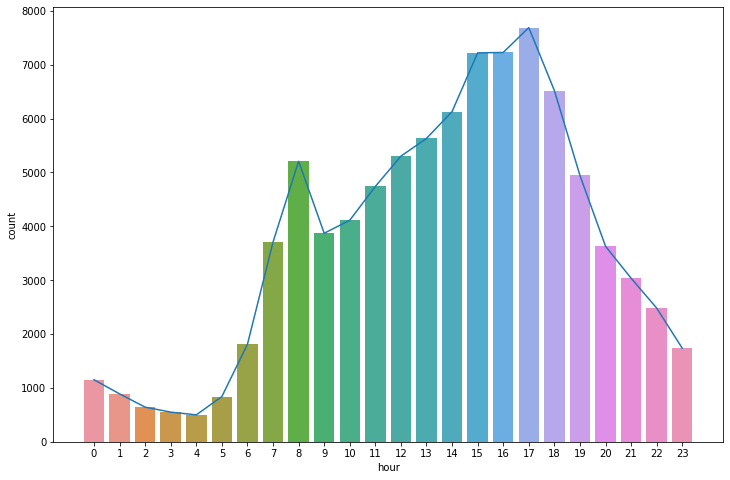

In [85]:
## Minor Accidents

plt.figure(figsize = (12,8))
sns.barplot(x = lion['hour'], y = lion['count'])
sns.lineplot(x = lion['hour'], y = lion['count'])
plt.show()

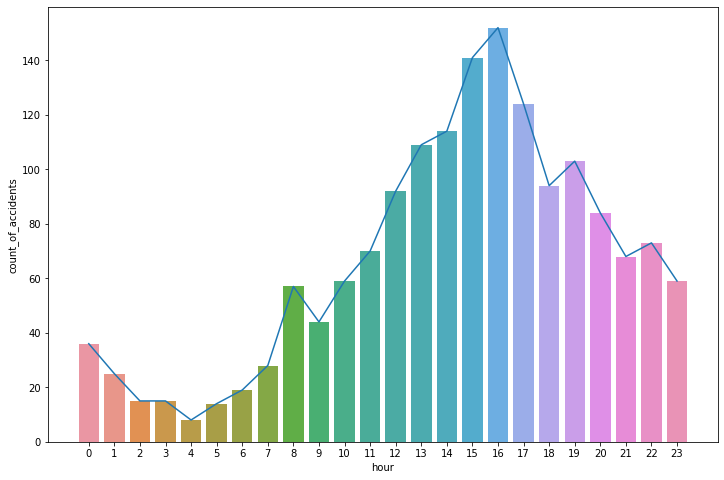

In [86]:
## Major Accidents

plt.figure(figsize = (12,8))
sns.barplot(x = accident_timing['hour'], y = accident_timing['count_of_accidents'])
plt.plot(accident_timing['hour'], accident_timing['count_of_accidents'])
plt.show()

In [87]:
## Comparing Days with df2 and df3

In [128]:
ui = df3.groupby('day_of_week')['number_of_casualties'].agg(['sum', 'count'])
ui.reset_index(inplace = True)
ui

,day_of_week,sum,count
0,1,12395,10051
1,2,15154,12579
2,3,15564,13056
3,4,16004,13360
4,5,16593,13863
5,6,17665,14629
6,7,14853,12044


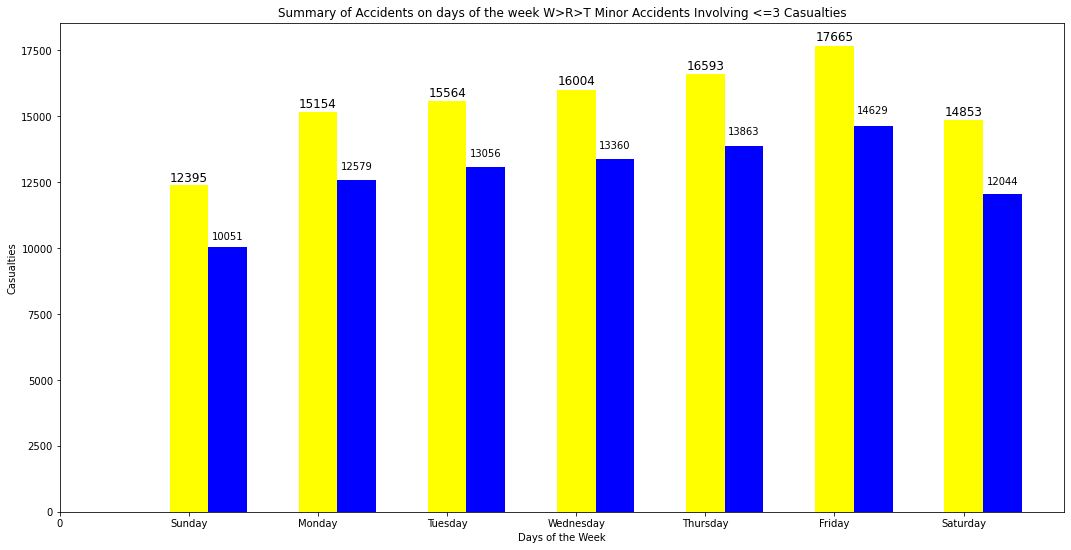

In [129]:
plt.figure(figsize = (18,9))
plt.bar(ui['day_of_week'], ui['sum'], width = 0.3, color ='yellow')
plt.bar(ui['day_of_week']+0.3, ui['count'], width = 0.3, color = 'blue')
x_ticks = np.arange(8)
x_labels = ['0', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Summary of Accidents on days of the week W>R>T Minor Accidents Involving <=3 Casualties')
for i in range(len(accident_dayofweek_df)):
    plt.text(i+1,ui['sum'].iloc[i]*1.02,ui['sum'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
    plt.text(i+1.3,ui['count'].iloc[i]*1.04,ui['count'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'medium')

plt.show()

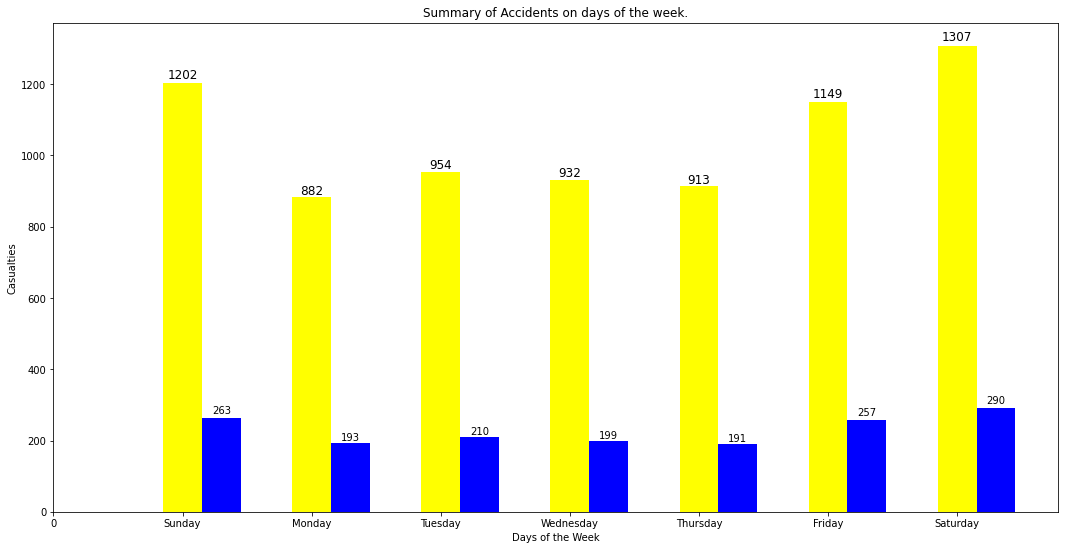

In [90]:
plt.figure(figsize = (18,9))
plt.bar(accident_dayofweek_df['day_of_week'], accident_dayofweek_df['number_of_casualties'], width = 0.3, color ='yellow')
plt.bar(accident_dayofweek_df['day_of_week']+0.3, accident_dayofweek_df['count_of_casualties'], width = 0.3, color = 'blue')
x_ticks = np.arange(8)
x_labels = ['0','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Summary of Accidents on days of the week.')
for i in range(len(accident_dayofweek_df)):
    plt.text(i+1,accident_dayofweek_df['number_of_casualties'].iloc[i]*1.02,accident_dayofweek_df['number_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'large')
    plt.text(i+1.3,accident_dayofweek_df['count_of_casualties'].iloc[i]*1.08,accident_dayofweek_df['count_of_casualties'].iloc[i], fontstyle = 'normal',color = 'black',ha = 'center' ,verticalalignment='center', fontsize = 'medium')

plt.show()

In [91]:
## Comparision between Accidents took place in urban and rural.

In [92]:
wolf = df3.groupby(['day_of_week', 'urban_or_rural_area'])['number_of_casualties'].agg(['sum', 'count'])
wolf.reset_index(inplace = True)
wolf

,day_of_week,urban_or_rural_area,sum,count
0,1,1,7609,6358
1,1,2,4786,3693
2,2,1,10102,8670
3,2,2,5052,3909
4,3,1,10385,8977
5,3,2,5179,4079
6,4,1,10771,9287
7,4,2,5233,4073
8,5,1,10823,9383
9,5,2,5770,4480


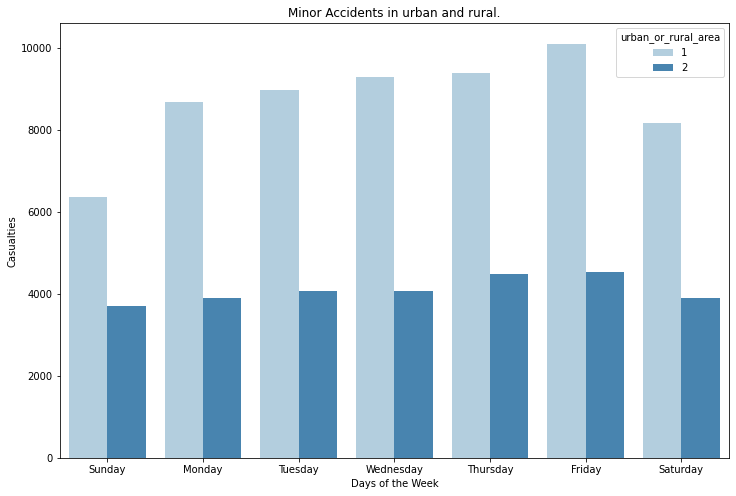

In [93]:
plt.figure(figsize = (12,8))
sns.barplot(x = wolf['day_of_week'], y = wolf['count'], hue = wolf['urban_or_rural_area'], palette = 'Blues')
x_ticks = np.arange(7)
x_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Minor Accidents in urban and rural.')
plt.show()

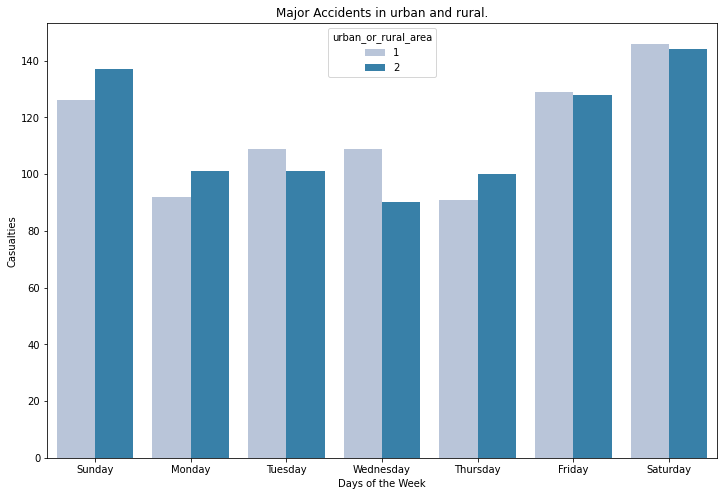

In [94]:
plt.figure(figsize = (12,8))
sns.barplot(x = urban_rural_df['day_of_week'], y = urban_rural_df['count'], hue = urban_rural_df['urban_or_rural_area'], palette = 'PuBu')
x_ticks = np.arange(7)
x_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks =x_ticks, labels = x_labels)
plt.xlabel('Days of the Week')
plt.ylabel('Casualties')
plt.title('Major Accidents in urban and rural.')
plt.show()

In [95]:
df[df['accident_severity'] == 3]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,2020-04-02,3,2021-11-29 09:00:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1,United Kingdom,4,2,9
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,2020-04-27,2,2021-11-29 13:55:00,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,United Kingdom,4,27,13
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,2020-01-01,4,2021-11-29 01:25:00,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,United Kingdom,1,1,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,2020-01-01,4,2021-11-29 02:25:00,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,United Kingdom,1,1,2
5,2020010228012,2020,10228012,-0.025880,51.476278,3,1,1,2020-01-01,4,2021-11-29 01:30:00,3,2209,2,20,3,4,6,0,0,0,4,1,1,0,0,1,United Kingdom,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91192,2020991024209,2020,991024209,-3.662274,55.116161,3,2,2,2020-01-08,7,2021-11-29 13:27:00,3,76,6,60,9,4,6,0,0,0,1,1,1,0,0,2,United Kingdom,1,8,13
91193,2020991024526,2020,991024526,-3.841439,56.331864,3,1,1,2020-11-17,3,2021-11-29 12:00:00,6,0,9,60,0,-1,6,0,0,0,1,2,2,0,7,2,United Kingdom,11,17,12
91195,2020991029573,2020,991029573,-4.267565,55.802353,3,1,1,2020-11-13,6,2021-11-29 15:05:00,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,11,13,15
91197,2020991030900,2020,991030900,-3.968753,55.950940,3,2,1,2020-12-15,3,2021-11-29 14:00:00,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,12,15,14


In [96]:
df[(df['accident_severity'] == 3) & (df['number_of_casualties'] > 3)]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,2020-03-01,6,2021-11-29 22:45:00,3,10,1,20,1,2,3,406,0,9,4,1,1,0,0,1,United Kingdom,3,1,22
279,2020010228985,2020,10228985,-0.299502,51.530914,3,4,6,2020-07-01,3,2021-11-29 19:24:00,3,40,3,40,0,-1,6,0,0,0,4,1,1,0,0,1,United Kingdom,7,1,19
341,2020010229256,2020,10229256,0.085239,51.594004,3,1,6,2020-08-01,4,2021-11-29 15:40:00,5,0,7,30,1,4,3,123,0,1,1,1,1,0,0,1,United Kingdom,8,1,15
465,2020010229703,2020,10229703,0.063300,51.509032,3,1,5,2020-10-01,6,2021-11-29 22:45:00,3,117,1,30,2,4,6,0,0,0,4,1,1,1,0,1,United Kingdom,10,1,22
653,2020010230293,2020,10230293,0.176630,51.451586,3,3,5,2020-01-14,3,2021-11-29 13:35:00,3,207,6,30,3,2,3,207,0,5,1,5,2,0,0,1,United Kingdom,1,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90445,2020990993723,2020,990993723,-4.245301,55.801441,3,2,5,2020-10-27,3,2021-11-29 17:39:00,4,766,3,30,6,2,6,0,0,5,4,2,2,0,0,1,United Kingdom,10,27,17
90569,2020990996718,2020,990996718,-4.313371,55.849322,3,3,4,2020-06-11,6,2021-11-29 16:00:00,1,8,3,30,0,-1,6,0,0,0,1,1,1,0,1,1,United Kingdom,6,11,16
90709,2020991000187,2020,991000187,-4.160163,55.849296,3,2,4,2020-11-19,5,2021-11-29 12:07:00,4,765,6,30,6,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,11,19,12
91049,2020991009084,2020,991009084,-3.429875,56.048213,3,3,4,2020-07-12,2,2021-11-29 13:40:00,3,823,3,40,0,-1,6,0,0,0,1,1,1,4,0,1,United Kingdom,7,12,13


In [97]:
df[df['accident_severity'] == 2]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,2020-01-01,4,2021-11-29 01:50:00,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,United Kingdom,1,1,1
7,2020010228017,2020,10228017,-0.039390,51.523195,2,2,1,2020-01-01,4,2021-11-29 03:00:00,3,11,3,30,9,4,6,0,0,0,4,8,2,0,0,1,United Kingdom,1,1,3
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,2020-01-01,4,2021-11-29 03:40:00,3,10,3,40,6,2,5,0,0,5,4,1,2,0,0,1,United Kingdom,1,1,3
13,2020010228032,2020,10228032,-0.182588,51.453048,2,3,1,2020-01-01,4,2021-11-29 01:10:00,6,0,6,20,0,-1,6,0,0,0,4,1,2,0,0,1,United Kingdom,1,1,1
19,2020010228077,2020,10228077,-0.109087,51.454673,2,2,1,2020-01-01,4,2021-11-29 08:00:00,3,2214,6,30,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91183,2020991017247,2020,991017247,-3.944559,55.732713,2,3,4,2020-10-16,6,2021-11-29 16:12:00,3,71,6,30,6,2,4,7019,0,4,1,1,1,0,0,1,United Kingdom,10,16,16
91184,2020991017285,2020,991017285,-2.922301,56.477171,2,1,1,2020-01-12,3,2021-11-29 17:17:00,4,961,6,30,0,-1,6,0,0,4,4,1,1,0,0,1,United Kingdom,1,12,17
91189,2020991023621,2020,991023621,-2.946947,56.491558,2,1,1,2020-10-11,3,2021-11-29 10:30:00,6,0,7,20,3,4,6,0,0,0,1,9,2,0,0,1,United Kingdom,10,11,10
91194,2020991027064,2020,991027064,-2.926320,56.473539,2,2,1,2020-12-08,4,2021-11-29 14:30:00,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,United Kingdom,12,8,14


In [98]:
cols = ['number_of_vehicles', 'number_of_casualties','day_of_week', 'road_type',  'junction_control', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area']

In [99]:
ko = df[df['accident_severity'] == 3]
for i in cols:
  print(ko[i].value_counts())

2     47118
1     18012
3      4908
4      1035
5       248
6        74
7        31
8         7
10        3
9         3
12        1
11        1
Name: number_of_vehicles, dtype: int64
1     58757
2      9418
3      2262
4       684
5       219
6        59
7        25
9         6
8         6
10        3
17        1
11        1
Name: number_of_casualties, dtype: int64
6    11721
5    11025
4    10753
3    10530
2    10121
7     9481
1     7810
Name: day_of_week, dtype: int64
6    51503
3    10475
1     4686
9     1838
2     1671
7     1268
Name: road_type, dtype: int64
 4    31755
-1    28723
 2     8749
 9     1451
 3      465
 1      298
Name: junction_control, dtype: int64
1    51003
4    14780
6     3257
7     1886
5      515
Name: light_conditions, dtype: int64
1    55003
2     9275
8     2198
9     2103
5     1270
4     1024
7      371
3      140
6       57
Name: weather_conditions, dtype: int64
 1    49086
 2    20457
 9      778
 4      587
-1      269
 5      141
 3      123
Name

In [100]:
jo = df[df['accident_severity'] == 2]
for i in cols:
  print(jo[i].value_counts())

2     9738
1     7054
3     1190
4      258
5       76
6       18
7       13
8        4
13       1
11       1
Name: number_of_vehicles, dtype: int64
1     14437
2      2567
3       829
4       333
5       110
6        47
7        18
8         6
11        2
13        1
12        1
41        1
9         1
Name: number_of_casualties, dtype: int64
6    2960
5    2819
7    2624
4    2624
3    2566
2    2462
1    2298
Name: day_of_week, dtype: int64
6    14336
3     2476
1      863
2      289
7      225
9      164
Name: road_type, dtype: int64
-1    8658
 4    7839
 2    1580
 3     115
 9      85
 1      76
Name: junction_control, dtype: int64
1    12641
4     3954
6     1324
7      284
5      150
Name: light_conditions, dtype: int64
1    14590
2     2172
8      411
5      355
4      343
9      303
7      121
3       43
6       15
Name: weather_conditions, dtype: int64
 1    12677
 2     5335
 4      165
 9       69
-1       42
 5       39
 3       26
Name: road_surface_conditions, dtype: i

In [101]:
po = df[df['accident_severity'] == 1]
for i in cols:
  print(po[i].value_counts())

1    662
2    525
3    142
4     41
6      7
5      7
8      4
7      3
Name: number_of_vehicles, dtype: int64
1     956
2     233
3     123
4      46
5      20
6       9
8       2
19      1
11      1
Name: number_of_casualties, dtype: int64
7    229
5    210
1    206
6    205
2    189
4    182
3    170
Name: day_of_week, dtype: int64
6    1080
3     253
1      30
7      19
2       6
9       3
Name: road_type, dtype: int64
-1    911
 4    399
 2     76
 1      3
 3      2
Name: junction_control, dtype: int64
 1    804
 4    291
 6    253
 7     22
 5     20
-1      1
Name: light_conditions, dtype: int64
 1    1127
 2     134
 5      40
 4      33
 8      20
 7      18
 9      15
 3       2
 6       1
-1       1
Name: weather_conditions, dtype: int64
 1    924
 2    446
 4     12
 5      4
-1      4
 3      1
Name: road_surface_conditions, dtype: int64
 0    1353
 4      20
 7       4
 5       4
-1       3
 1       3
 9       2
 2       2
Name: special_conditions_at_site, dtype: int64
 

In [102]:
pd.set_option("display.max_rows", 1000)
fish = jo.groupby(['accident_severity','number_of_vehicles','day_of_week', 'road_type',  'junction_control', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards'])['number_of_casualties'].count().reset_index()
fish = pd.DataFrame(data = fish)

In [103]:
fish[['special_conditions_at_site', 'number_of_casualties']]

,special_conditions_at_site,number_of_casualties
0,0,2
1,0,1
2,0,1
3,0,1
4,0,13
...,...,...
3673,0,2
3674,0,1
3675,0,1
3676,0,1


## Plotting Latitude and Longitude on a Map 

In [104]:
df2[(df2['number_of_casualties'] > 7) & (df2['number_of_casualties'] < 13)]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,country,month,day,hour
1561,2020010233165,2020,10233165,-0.259823,51.416288,3,2,9,2020-01-28,3,2021-11-29 10:41:00,3,238,7,30,5,4,6,0,0,0,1,1,2,0,0,1,United Kingdom,1,28,10
3102,2020010237692,2020,10237692,0.224735,51.587108,1,8,11,2020-02-20,5,2021-11-29 13:17:00,5,0,6,30,0,-1,6,0,0,0,1,8,2,0,0,1,United Kingdom,2,20,13
13262,2020010266513,2020,10266513,-0.182428,51.443315,2,1,8,2020-08-09,3,2021-11-29 15:10:00,6,0,6,20,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,8,9,15
15616,2020010272783,2020,10272783,0.129760,51.564553,3,2,8,2020-09-10,6,2021-11-29 08:32:00,5,0,6,30,6,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,9,10,8
19333,2020010283074,2020,10283074,0.043701,51.460742,2,3,8,2020-06-12,1,2021-11-29 13:01:00,5,0,6,30,3,4,6,0,0,0,1,1,2,0,0,1,United Kingdom,6,12,13
24838,2020052001362,2020,52001362,-3.002712,53.647484,3,3,8,2020-12-07,1,2021-11-29 15:15:00,6,0,6,30,2,4,6,0,0,8,1,1,1,0,0,1,United Kingdom,12,7,15
25107,2020052001793,2020,52001793,-2.950632,53.411965,3,2,9,2020-04-09,6,2021-11-29 17:00:00,3,57,6,30,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,4,9,17
26335,202006F172817,2020,06F172817,-2.316258,53.502897,2,3,11,2020-08-07,4,2021-11-29 16:50:00,3,580,3,50,0,-1,6,0,0,0,1,2,2,0,0,1,United Kingdom,8,7,16
27507,202006M278142,2020,06M278142,-2.317485,53.392622,3,2,9,2020-06-12,1,2021-11-29 11:01:00,3,560,3,40,6,2,4,5165,0,0,1,1,1,0,0,1,United Kingdom,6,12,11
27743,202006P271189,2020,06P271189,-2.152090,53.611141,2,1,9,2020-04-29,4,2021-11-29 14:12:00,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,United Kingdom,4,29,14
